# Kinematics
Analysis of the kinematics of the sample distributions for different pi0 and 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot3 as up3
import os

In [3]:
dm_type = "scalar"
dt_ratio = 0.33 # or 0.33

# Import all files

In [4]:
# in data, we could have data/root/BdNMC/...
# ... = fermionic/ or scalar/
# we may have other types of root files later, so might be good to seperate them!

# load data
data_path = f"../data/root/BdNMC/{dm_type}/"

# get a list of root files
fname_list_all_dt = os.listdir(data_path)
fname_list = [f for f in fname_list_all_dt if f"dt_{str(dt_ratio)}" in f]
print(fname_list)


['pi0_scalar_ma_0.03_dt_0.33.root', 'eta_scalar_ma_0.4_dt_0.33.root', 'pi0_scalar_ma_0.09_dt_0.33.root', 'pi0_scalar_ma_0.04_dt_0.33.root', 'eta_scalar_ma_0.05_dt_0.33.root', 'eta_scalar_ma_0.7_dt_0.33.root', 'eta_scalar_ma_0.02_dt_0.33.root', 'eta_scalar_ma_0.01_dt_0.33.root', 'pi0_scalar_ma_0.1_dt_0.33.root', 'pi0_scalar_ma_0.2_dt_0.33.root', 'eta_scalar_ma_0.8_dt_0.33.root', 'eta_scalar_ma_0.08_dt_0.33.root', 'pi0_scalar_ma_0.08_dt_0.33.root', 'eta_scalar_ma_0.6_dt_0.33.root', 'pi0_scalar_ma_0.06_dt_0.33.root', 'eta_scalar_ma_0.04_dt_0.33.root', 'pi0_scalar_ma_0.01_dt_0.33.root', 'eta_scalar_ma_0.09_dt_0.33.root', 'eta_scalar_ma_0.5_dt_0.33.root', 'eta_scalar_ma_0.2_dt_0.33.root', 'eta_scalar_ma_0.06_dt_0.33.root', 'pi0_scalar_ma_0.05_dt_0.33.root', 'eta_scalar_ma_0.07_dt_0.33.root', 'pi0_scalar_ma_0.02_dt_0.33.root', 'eta_scalar_ma_0.03_dt_0.33.root', 'eta_scalar_ma_0.3_dt_0.33.root', 'pi0_scalar_ma_0.07_dt_0.33.root', 'eta_scalar_ma_0.1_dt_0.33.root']


In [5]:
# for file in fname_list:
#     data = up3.open(f"{data_path}{file}")
#     if data.keys() == []:
#         print(f"Empty file: {file}")
#         continue
#     electron_data = data["elecron_tree"]
#     all_keys = electron_data.keys()

#     ma =  file.split("_")[3]

#     N_electrons = electron_data.numentries

#     for key in electron_data.keys():
#         plt.hist(electron_data[key].array(), bins=25, fill=False, histtype="step", color="k",label=f"Electrons ({N_electrons})")
#         plt.xlabel(key.decode("utf-8"))
#         plt.ylabel("Counts")
#         plt.title(f"{key.decode('utf-8')} for {dm_type}"+r" $\chi$" "\n "+r"$M_{\chi}/M_{A'}=$"+f"{dt_ratio}" + r" $M_{A'}=$"+f"{ma} GeV")
#         plt.legend()
#         plt.show()

#     data.close()

In [6]:
# # plot dynmics for a few MA'
# selected_ma = [0.01, 0.05, 0.1, 0.2]
# for key in all_keys:
#     fig = plt.figure()
#     ax = fig.add_subplot(111)

#     # get data
#     dfe = {i:[] for i in selected_ma}
#     N_electrons_dict = {i:0 for i in selected_ma}
#     for ma in selected_ma:
#         file = f"pi0_{dm_type}_ma_{ma}_dt_{dt_ratio}.root"
#         data = up3.open(f"{data_path}{file}")
#         electron_data = data["elecron_tree"]
#         N_electrons_dict[ma] = electron_data.numentries
#         dfe[ma] = electron_data[key].array()
#         data.close()


#     # get bin edges
#     n_bins = 10
#     min_value = np.amin([np.amin(array) for array in dfe.values()])
#     max_value = np.amax([np.amax(array) for array in dfe.values()])
#     bin_width = (max_value - min_value) / n_bins
#     bins = np.arange(min_value, max_value, bin_width)

    
#     # plot
#     for ma in selected_ma:
#         ax.hist(dfe[ma], bins=bins, fill=False, histtype="step", label=r"$M_{A'}=$"+f"{ma} ({N_electrons_dict[ma]})", density=True)
#         ax.set_xlabel(key.decode("utf-8"))
#         ax.set_ylabel("Normalised Counts")
#         ax.set_title(f"{key.decode('utf-8')} for {dm_type}"+r" $\chi$" "\n "+r"$M_{\chi}/M_{A'}=$"+f"{dt_ratio}")
#         ax.legend()

#     plt.savefig(f"../plots/4comparison/{dm_type}_{key.decode('utf-8')}_dt_{dt_ratio}.png")
#     plt.show()
    



##  POT Scalled
$$ \text{POT} = \frac{\text{POT}_\text{g4numi}\times\text{Num. of trials}}{\text{N}_m\times \text{BR}(m \rightarrow \gamma \chi \bar\chi) \times \text{max}(\omega_{int})} $$

In [7]:
POT_run1_microboone = 2e20 # From online i found run 1 to be 2e20 and 1.9e20 and 2.2e20
import sys
sys.path.append("../")
from src.PoT_scalling import pot_scale

In [8]:
f = up3.open(f"{data_path}{fname_list[0]}")
ntrials = f["pot_tree"]["ntrials"].array()
tot_pot = f["pot_tree"]["tot_pot"].array()
BR = f["pot_tree"]["branching_ratio"].array()
f.close()

#print(ntrials, tot_pot,BR)
#print(pot(POT_g4numi, ntrials, tot_pot, BR, [1.0]))

In [9]:
pot_df = pd.DataFrame(columns=["DM_type", "meson", "dt", "MA", "POT", "N-electons", "PoT-Scaled-N-electrons"])
data_types = ["scalar", "fermion"]
i = 0
for dm_type in data_types:
    path = f"../data/root/BdNMC/{dm_type}/"
    for file in os.listdir(path):
        with up3.open(f"{path}{file}") as f:
            if f.keys() == []:
                print(f"Empty file: {file}")
                continue
            tot_pot = f["pot_tree"]["tot_pot"].array()
            N_electrons = f["elecron_tree"].numentries
            pmax = f["pot_tree"]["pmax"].array()
            pot_scaled_n_el = pot_scale(N_electrons, tot_pot, POT_run1_microboone) * pmax
            
            pot_df.loc[i] = {"DM_type":dm_type, "meson":file.split('_')[0], "dt":file.split('_')[5][:-5], "MA":file.split('_')[3], "POT":tot_pot, "N-electons":N_electrons, "PoT-Scaled-N-electrons":pot_scaled_n_el}
            i += 1

Empty file: eta_fermion_ma_0.06_dt_0.33.root
Empty file: eta_fermion_ma_0.03_dt_0.33.root
Empty file: eta_fermion_ma_0.05_dt_0.33.root
Empty file: eta_fermion_ma_0.01_dt_0.33.root
Empty file: pi0_fermion_ma_0.01_dt_0.33.root
Empty file: eta_fermion_ma_0.07_dt_0.33.root
Empty file: pi0_fermion_ma_0.04_dt_0.33.root
Empty file: eta_fermion_ma_0.09_dt_0.33.root
Empty file: pi0_fermion_ma_0.02_dt_0.33.root
Empty file: eta_fermion_ma_0.08_dt_0.33.root
Empty file: pi0_fermion_ma_0.03_dt_0.33.root
Empty file: eta_fermion_ma_0.01_dt_0.6.root
Empty file: eta_fermion_ma_0.1_dt_0.33.root
Empty file: eta_fermion_ma_0.04_dt_0.33.root
Empty file: eta_fermion_ma_0.02_dt_0.33.root
Empty file: pi0_fermion_ma_0.05_dt_0.33.root


In [10]:
display(pot_df.head())
pot_df.to_csv("../data/csv/pot_all_w_1.csv", index=False)

,DM_type,meson,dt,MA,POT,N-electons,PoT-Scaled-N-electrons
0,scalar,pi0,0.6,0.01,[2238328896246766.5],612,[2625.3176421187104]
1,scalar,pi0,0.33,0.03,[17478807726572.629],436,[12756.740342982375]
2,scalar,eta,2.0,0.04,[3.7422169334653754e+17],271,[0.10645325461753105]
3,scalar,eta,2.0,0.09,[2.771191609406244e+19],236,[2.2979707395235926e-05]
4,scalar,eta,0.33,0.4,[3118927718149906.5],255,[0.0009609583745826262]


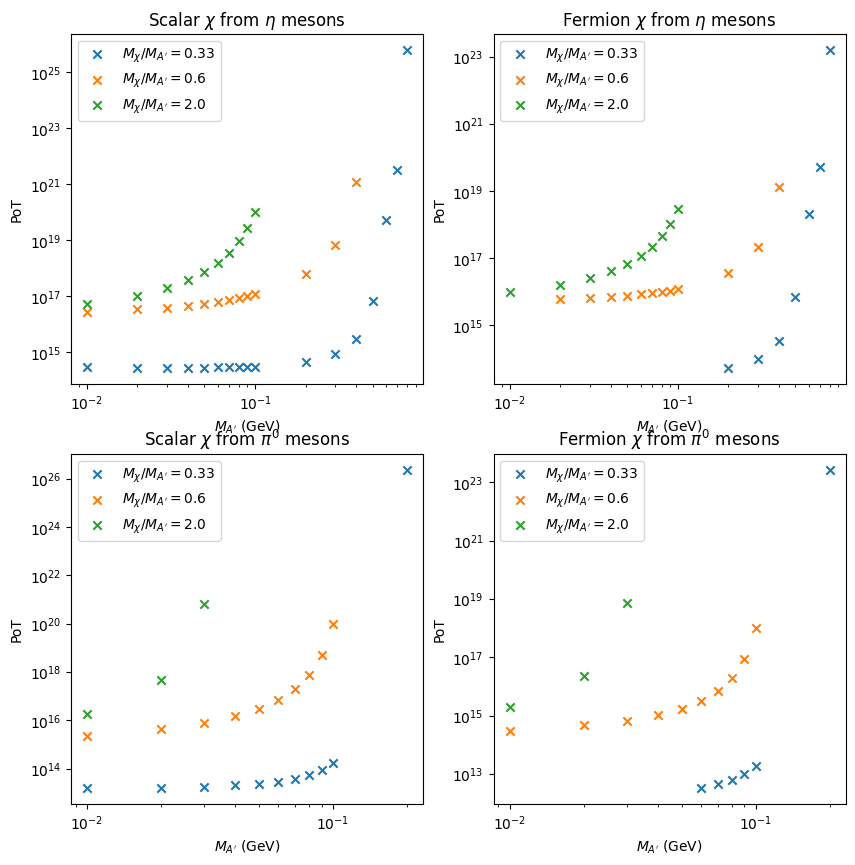

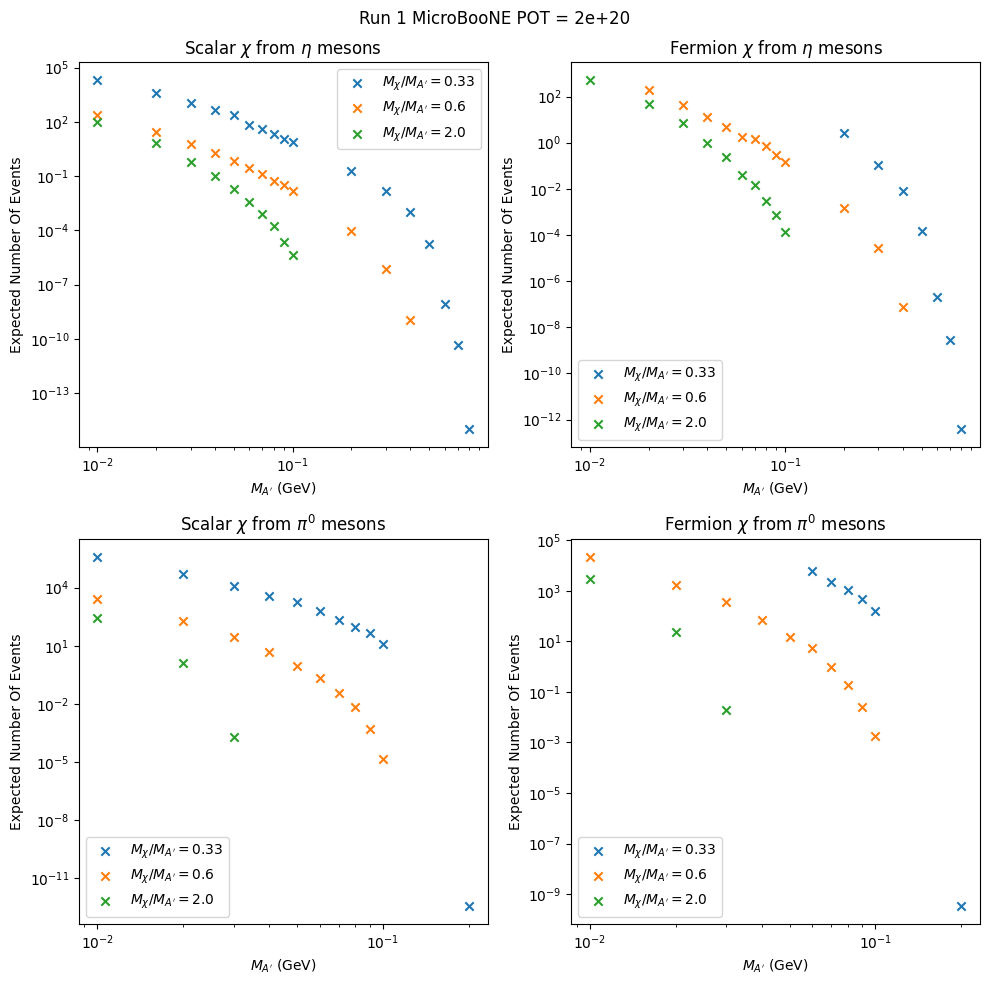

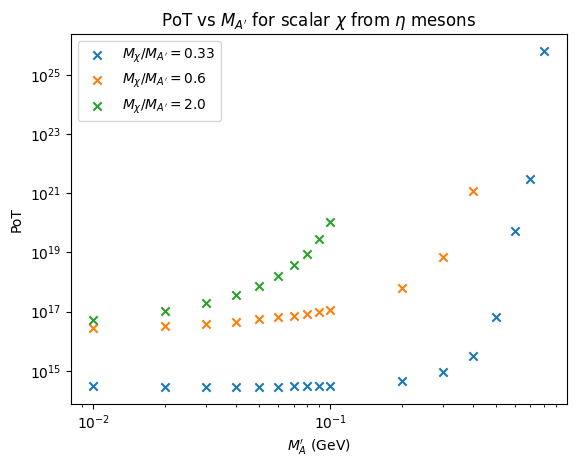

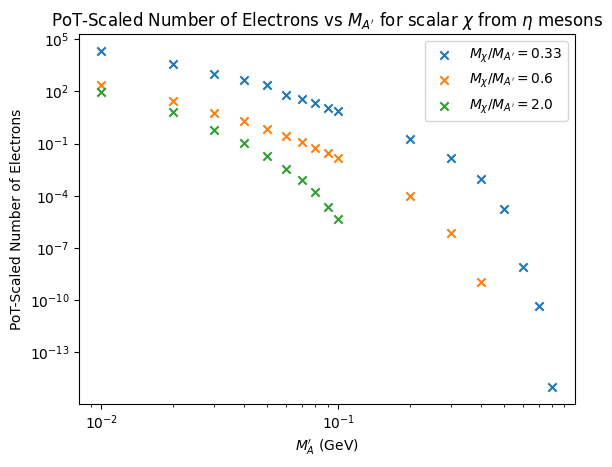

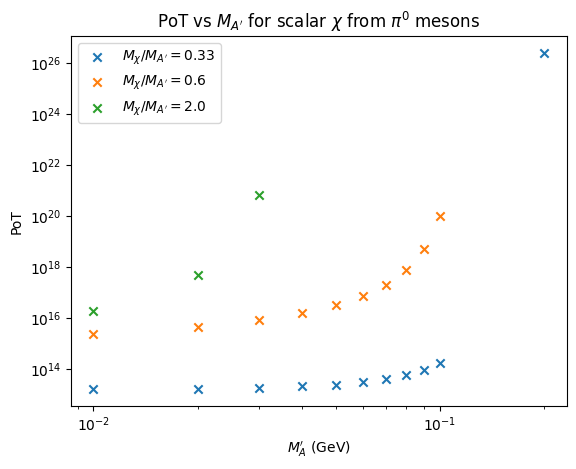

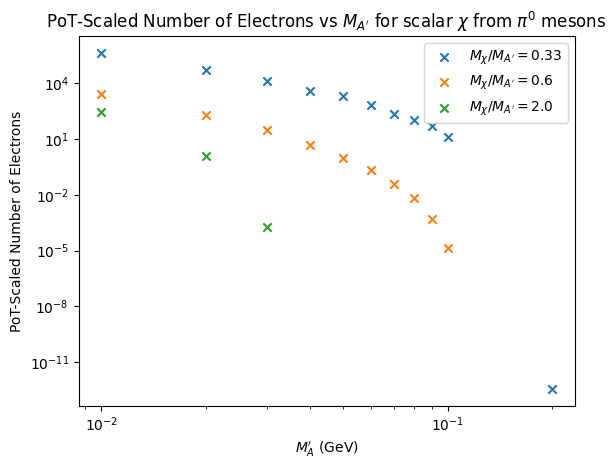

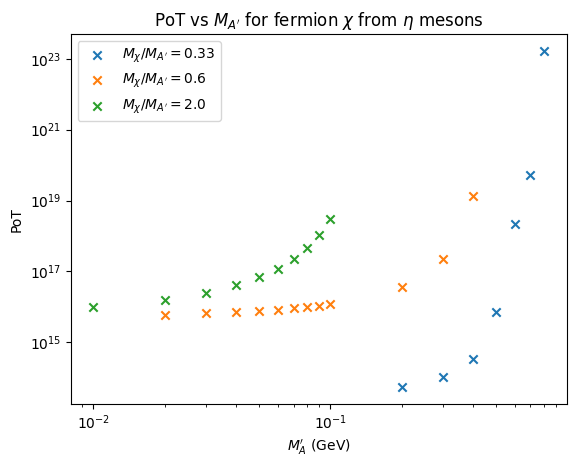

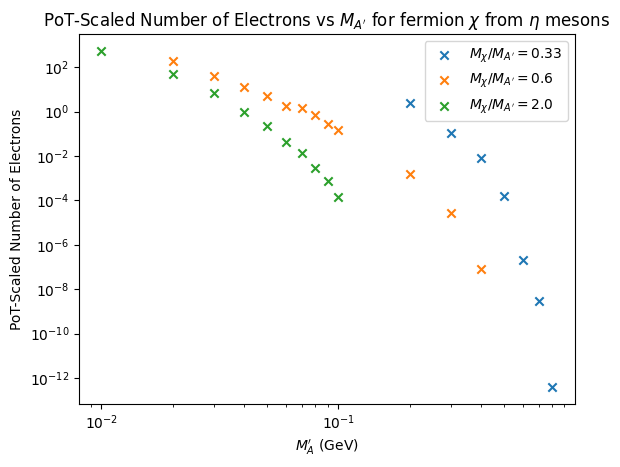

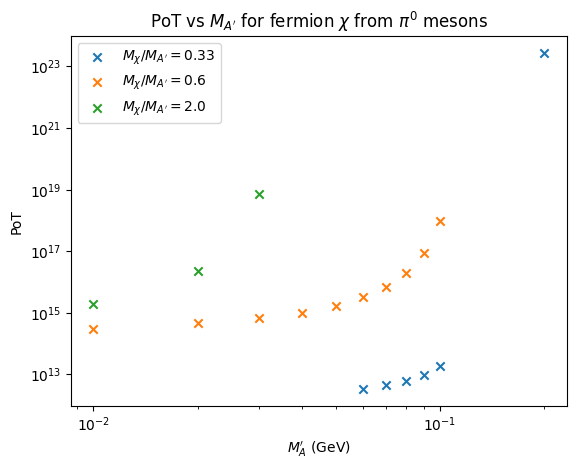

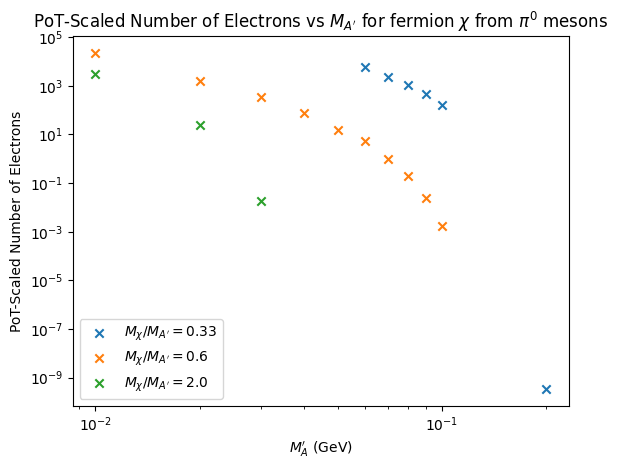

In [11]:
dt_ratios = ["0.33", "0.6", "2.0"]

fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.subplots(2,2)
fig4 = plt.figure(figsize=(10,10))
ax4 = fig4.subplots(2,2)

i = 0
j = 0
for dm_type in data_types:
    for meson in ["eta", "pi0"]:
        fig = plt.figure()
        ax = fig.add_subplot(111)

        fig3 = plt.figure()
        ax3 = fig3.add_subplot(111)
        for dt in dt_ratios:
            df_local = pot_df[(pot_df["DM_type"]==dm_type) & (pot_df["dt"]==dt) & (pot_df["meson"]==meson)]
            #display(df_local)
            ax.scatter(df_local["MA"].astype(float), df_local["POT"].astype(float), label=r"$M_\chi / M_{A'}=$"+f"{dt}", marker="x")

            if meson == "pi0":
                m_string = r"$\pi^0$"
            else:
                m_string = r"$\eta$"
            ax2[i,j].scatter(df_local["MA"].astype(float), df_local["POT"].astype(float), label=r"$M_\chi / M_{A'}=$"+f"{dt}", marker="x")
            ax2[i,j].loglog()
            ax2[i,j].legend()
            ax2[i,j].set(title=f"{dm_type.capitalize()} "+r"$\chi$ from "+rf"{m_string} mesons", xlabel=r"$M_{A'}$ (GeV)", ylabel="PoT")


            ax3.scatter(df_local["MA"].astype(float), df_local["PoT-Scaled-N-electrons"].astype(float), label=r"$M_\chi / M_{A'}=$"+f"{dt}", marker="x")

            ax4[i,j].scatter(df_local["MA"].astype(float), df_local["PoT-Scaled-N-electrons"].astype(float), label=r"$M_\chi / M_{A'}=$"+f"{dt}", marker="x")
            ax4[i,j].loglog()
            ax4[i,j].legend()
            ax4[i,j].set(title=f"{dm_type.capitalize()} "+r"$\chi$ from "+rf"{m_string} mesons", xlabel=r"$M_{A'}$ (GeV)", ylabel="Expected Number Of Events")


        i += 1


        ax.legend()
        if meson == "pi0":
            m_string = r"$\pi^0$"
        else:
            m_string = r"$\eta$"
        ax.set(title=r"PoT vs $M_{A'}$ for " + f"{dm_type} " + r"$\chi$ from " + rf"{m_string} mesons",
                xlabel=r"$M_A'$ (GeV)", ylabel="PoT")
        ax.loglog()
        fig.savefig(f"../plots/PoT/pot_vs_ma_{dm_type}_{meson}.png")

        ax3.legend()
        ax3.loglog()
        ax3.set(title=r"PoT-Scaled Number of Electrons vs $M_{A'}$ for " + f"{dm_type} " + r"$\chi$ from " + rf"{m_string} mesons",
                xlabel=r"$M_A'$ (GeV)", ylabel="PoT-Scaled Number of Electrons")
        fig3.savefig(f"../plots/PoT/n_e_pot_scaled_vs_ma_{dm_type}_{meson}.png")

    i=0
    j+=1

fig4.suptitle(f"Run 1 MicroBooNE POT = {POT_run1_microboone}")
fig2.savefig(f"../plots/PoT/pot_vs_ma_all.png")
fig4.tight_layout()
fig4.savefig(f"../plots/PoT/n_e_pot_scaled_vs_ma_all.png")


### Energy Cuts

In [20]:
E_min = 0.1 # GeV
pot_df = pd.DataFrame(columns=["DM_type", "meson", "dt", "MA", "POT", "N-electons", "PoT-Scaled-N-electrons"])
data_types = ["scalar", "fermion"]
i = 0
for dm_type in data_types:
    path = f"../data/root/BdNMC/{dm_type}/"
    for file in os.listdir(path):
        with up3.open(f"{path}{file}") as f:
            if f.keys() == []:
                print(f"Empty file: {file}")
                continue
            tot_pot = f["pot_tree"]["tot_pot"].array()
            #print(f["elecron_tree"].numentries)
            E_e = f["elecron_tree"]["electron_energy"].array()
            E_e = E_e[E_e > E_min]
            N_electrons = len(E_e)
            #print(N_electrons)
            pmax = f["pot_tree"]["pmax"].array()
            pot_scaled_n_el = pot_scale(N_electrons, tot_pot, POT_run1_microboone) * pmax
            
            pot_df.loc[i] = {"DM_type":dm_type, "meson":file.split('_')[0], "dt":file.split('_')[5][:-5], "MA":file.split('_')[3], "POT":tot_pot, "N-electons":N_electrons, "PoT-Scaled-N-electrons":pot_scaled_n_el}
            i += 1

Empty file: eta_fermion_ma_0.06_dt_0.33.root
Empty file: eta_fermion_ma_0.03_dt_0.33.root
Empty file: eta_fermion_ma_0.05_dt_0.33.root
Empty file: eta_fermion_ma_0.01_dt_0.33.root
Empty file: pi0_fermion_ma_0.01_dt_0.33.root
Empty file: eta_fermion_ma_0.07_dt_0.33.root
Empty file: pi0_fermion_ma_0.04_dt_0.33.root
Empty file: eta_fermion_ma_0.09_dt_0.33.root
Empty file: pi0_fermion_ma_0.02_dt_0.33.root
Empty file: eta_fermion_ma_0.08_dt_0.33.root
Empty file: pi0_fermion_ma_0.03_dt_0.33.root
Empty file: eta_fermion_ma_0.01_dt_0.6.root
Empty file: eta_fermion_ma_0.1_dt_0.33.root
Empty file: eta_fermion_ma_0.04_dt_0.33.root
Empty file: eta_fermion_ma_0.02_dt_0.33.root
Empty file: pi0_fermion_ma_0.05_dt_0.33.root


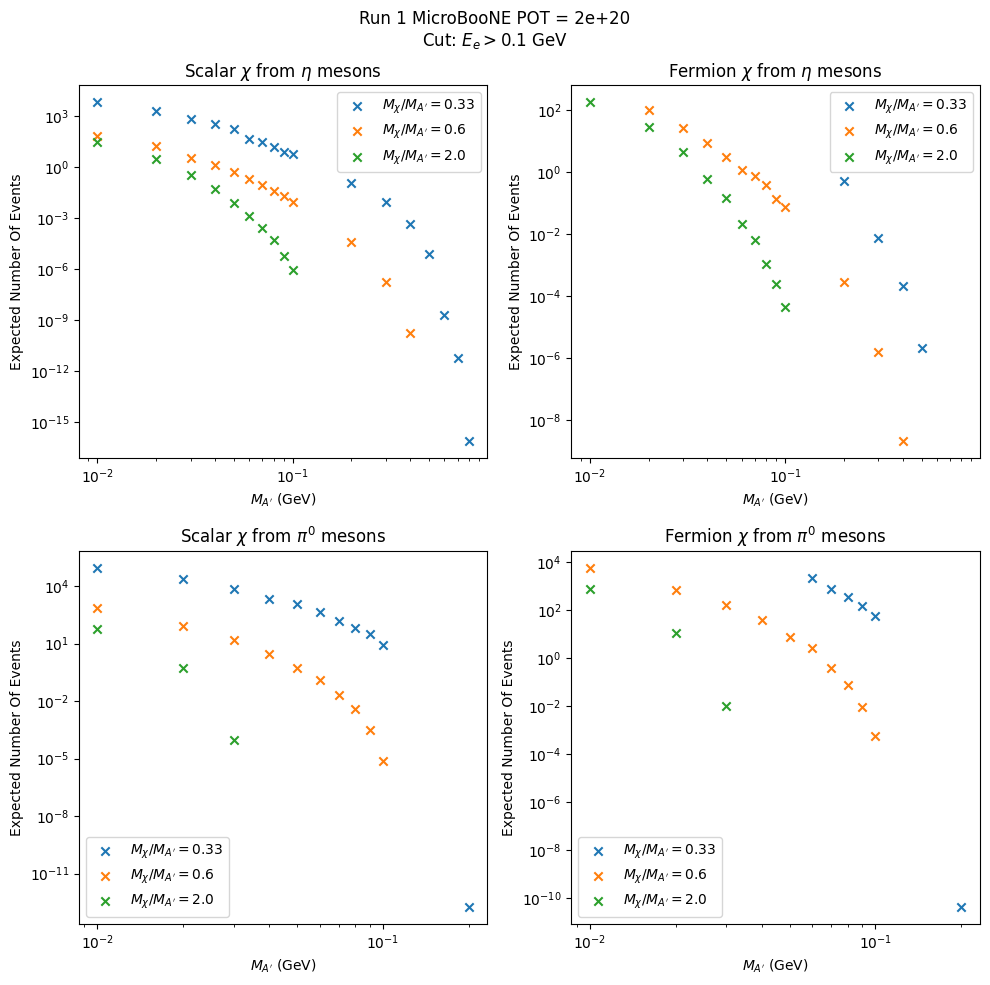

In [22]:
dt_ratios = ["0.33", "0.6", "2.0"]
fig4 = plt.figure(figsize=(10,10))
ax4 = fig4.subplots(2,2)

i = 0
j = 0
for dm_type in data_types:
    for meson in ["eta", "pi0"]:
        for dt in dt_ratios:
            df_local = pot_df[(pot_df["DM_type"]==dm_type) & (pot_df["dt"]==dt) & (pot_df["meson"]==meson)]
            # apply energy cut
            #display(df_local)

            if meson == "pi0":
                m_string = r"$\pi^0$"
            else:
                m_string = r"$\eta$"

            ax4[i,j].scatter(df_local["MA"].astype(float), df_local["PoT-Scaled-N-electrons"].astype(float), label=r"$M_\chi / M_{A'}=$"+f"{dt}", marker="x")
            ax4[i,j].loglog()
            ax4[i,j].legend()
            ax4[i,j].set(title=f"{dm_type.capitalize()} "+r"$\chi$ from "+rf"{m_string} mesons", xlabel=r"$M_{A'}$ (GeV)", ylabel="Expected Number Of Events")


        i += 1

        if meson == "pi0":
            m_string = r"$\pi^0$"
        else:
            m_string = r"$\eta$"
       
    i=0
    j+=1

fig4.suptitle(f"Run 1 MicroBooNE POT = {POT_run1_microboone}\nCut: $E_e > {E_min}$ GeV")
fig4.tight_layout()
fig4.savefig(f"../plots/PoT/n_e_pot_scaled_vs_ma_E_cuts.png")
fig4.savefig(f"../plots/PoT/n_e_pot_scaled_vs_ma_E_cuts.pdf")
plt.show()
